##### Gaussian Naive Bayes has been used to predict stock proce difference from previous day stock price and technical indicators

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_model.csv', header=0, parse_dates=[0])
df_cleaned = df.dropna()
df_cleaned.head(5)

,Date,Diff,Close-Open,High-Low,RSI,Close-EMA,MACD-Signal,ADX,CCI,NormATR,Close-BBup,Close-BBmid,Close-BBlow,Diff_t+1
33,2021-06-14,12.50,20.45,216.55,71.283947,220.522137,-11.062793,30.701480,73.768483,1.013346,-58.001894,66.97,191.941894,57.40
34,2021-06-15,57.40,2.30,59.20,72.757895,240.865852,-10.284952,30.241329,131.489400,0.977958,-60.536263,98.54,257.616263,-101.70
35,2021-06-16,-101.70,-79.95,138.25,66.267762,120.610405,-18.454491,29.063859,86.183101,0.976589,-118.251497,-29.60,59.051497,-76.15
36,2021-06-17,-76.15,43.10,152.60,61.821008,38.532351,-30.131212,27.133862,-3.409170,0.980699,-213.266636,-96.48,20.306636,-8.05
37,2021-06-18,-8.05,-73.15,310.60,61.352321,26.418037,-38.979394,25.979041,-73.215266,1.052577,-223.182481,-81.33,60.522481,63.15


In [3]:
df_cleaned_rndfclass = df_cleaned.copy()
df_cleaned_rndfclass['Y'] = np.where(df_cleaned_rndfclass['Diff_t+1']>=0,1,0)
df_cleaned_rndfclass = df_cleaned_rndfclass.drop(['Diff_t+1','Diff'], axis=1)

x = df_cleaned_rndfclass.drop(['Date','Y'], axis=1)
y = df_cleaned_rndfclass['Y']
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [4]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

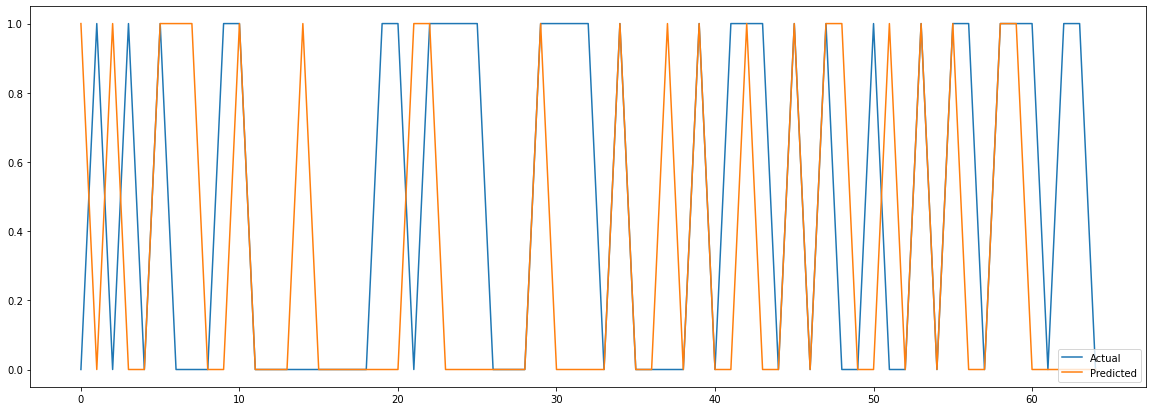

Directional error percentage: 58.46153846153847


In [5]:
# Actual vs Fitted
predictions = gnb.predict(X_test)
y_test = y_test.to_numpy()
plt.figure(figsize=(20,7))
plt.plot(y_test)
plt.plot(predictions)
plt.legend(["Actual", "Predicted"], loc ="lower right")
plt.show()

z=0
for i in range(y_test.shape[0]):
    if y_test[i]==predictions[i]:
        z=z+1

print("Directional error percentage:", z/y_test.shape[0]*100)